In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
wine = pd.read_excel('http://taanila.fi/wine.xlsx')
wine.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Users\noora\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\noora\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


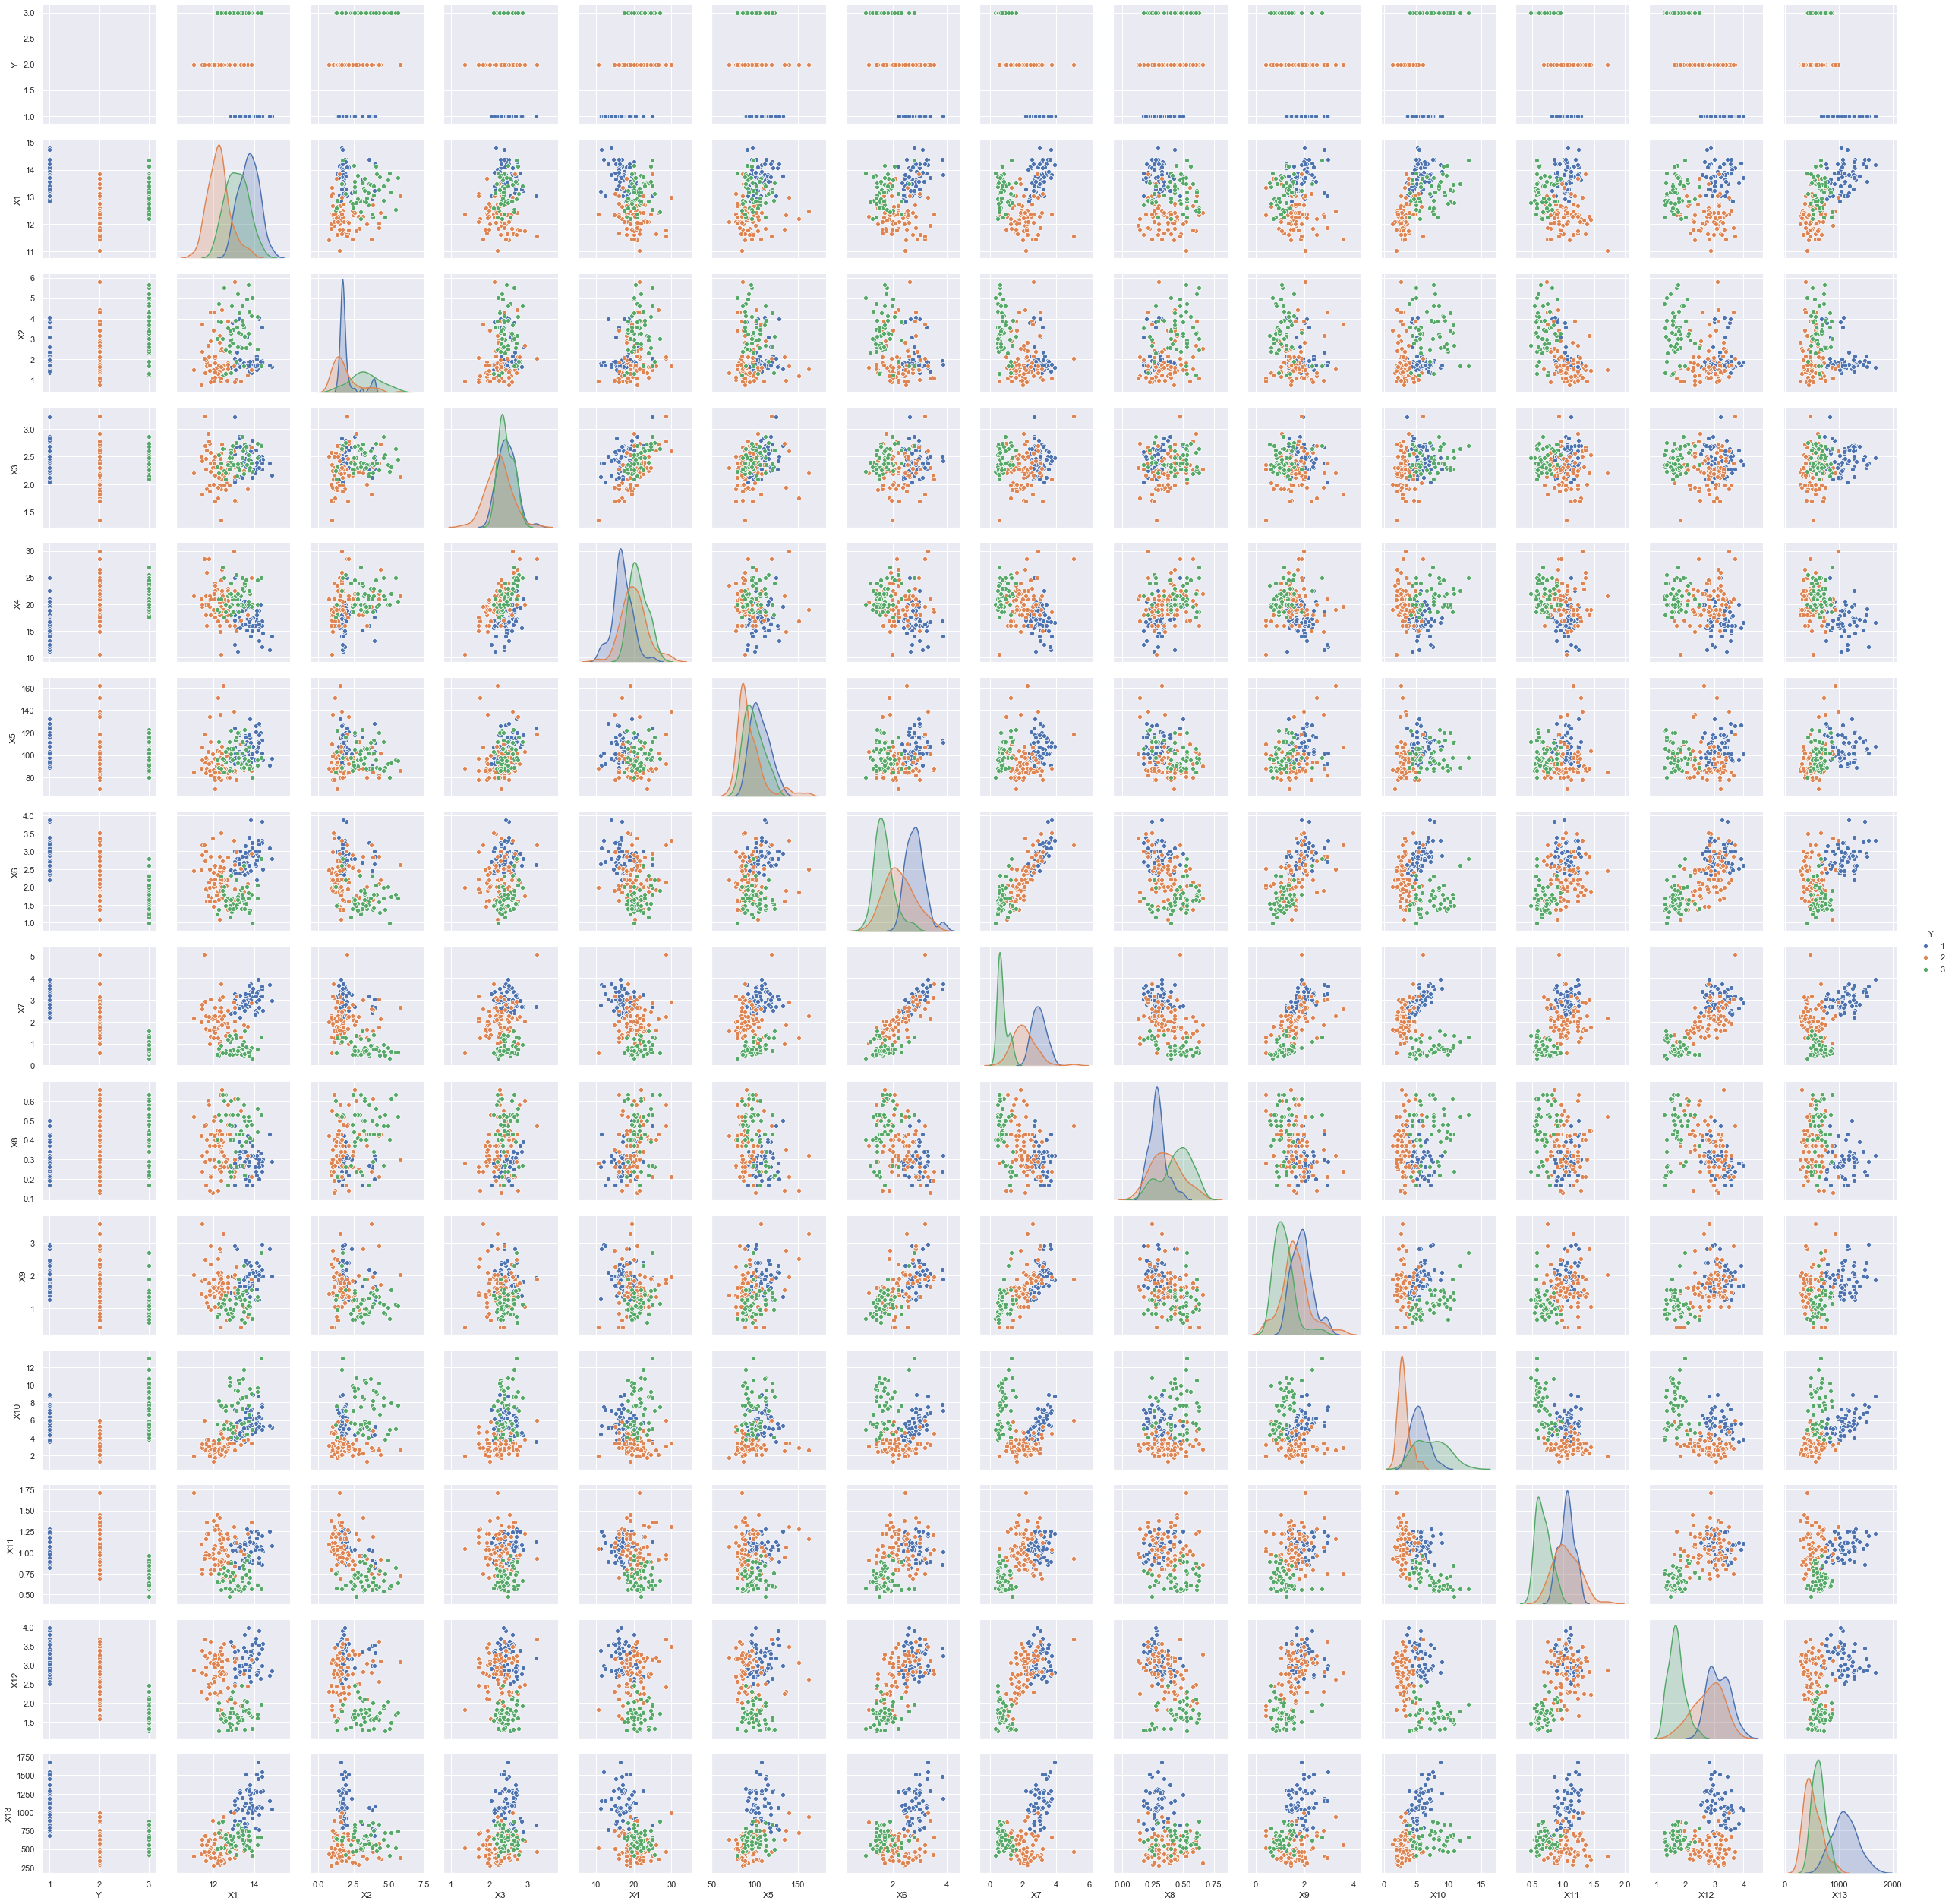

In [3]:
sns.pairplot(wine, hue='Y')

In [4]:
X = wine.drop('Y', axis =1)
y= wine['Y']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133,)
(45,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

malli = KNeighborsClassifier(n_neighbors=5)
malli.fit(X_train, y_train)

y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_malli)

0.8270676691729323

In [8]:
accuracy_score(y_test, y_test_malli)

#eli ei kovin hyvä

0.6888888888888889

In [9]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[38  2  0]
 [ 3 45  9]
 [ 3  6 27]]


In [10]:
print(confusion_matrix(y_test, y_test_malli))

[[16  0  3]
 [ 2  8  4]
 [ 2  3  7]]


In [11]:
winenew = pd.read_excel('winenew.xlsx')
winenew

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,14.19,1.59,2.48,16.5,108,3.3,3.93,0.32,1.86,8.7,1.23,2.82,1680
1,13.72,1.43,2.50,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285
2,13.40,3.91,2.48,23.0,102,1.8,0.75,0.43,1.41,7.3,0.70,1.56,750


In [12]:
malli.predict(winenew)

array([1, 1, 3], dtype=int64)